<a href="https://colab.research.google.com/github/Mayuri172-atole/DeepLearning/blob/main/TinyMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Simulating 3 types of hand gestures: wave, shake, and tap
gesture_data = {
    "wave": np.random.normal(0, 1, (100, 3)),
    "shake": np.random.normal(3, 1, (100, 3)),
    "tap": np.random.normal(-3, 1, (100, 3))
}

# Combine and create labels
data = np.vstack([gesture_data["wave"], gesture_data["shake"], gesture_data["tap"]])
labels = np.array([0]*100 + [1]*100 + [2]*100)  # 0=Wave, 1=Shake, 2=Tap

In [3]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(3,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

model.fit(data, labels, epochs=20, batch_size=10, verbose=1)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2219 - loss: 1.8668
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4474 - loss: 1.2530
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4601 - loss: 0.8560
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5562 - loss: 0.6772
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.5459
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.4687
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.4435
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.3831
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8108 - loss: 0.3652
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.3147
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9138 - loss: 0.2819
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - lo

In [9]:
import tensorflow as tf
import numpy as np

# --- Create dummy speech_data for demonstration ---
# Simulate 100 audio samples, each 16000 time steps long, and 10 classes
num_samples = 100
sample_rate = 16000 # Matches the input_shape=(16000,) of your model
num_classes = 10

dummy_audio_data = np.random.rand(num_samples, sample_rate).astype(np.float32)
dummy_labels = np.random.randint(0, num_classes, num_samples)

speech_data = tf.data.Dataset.from_tensor_slices((dummy_audio_data, dummy_labels))

print("Dummy speech_data created with elements of shape (audio_shape, label_shape):")
for audio_tensor, label_tensor in speech_data.take(1):
    print(f"Audio shape: {audio_tensor.shape}, Label shape: {label_tensor.shape}")

Dummy speech_data created with elements of shape (audio_shape, label_shape):
Audio shape: (16000,), Label shape: ()


In [10]:
def preprocess_audio(audio, label):
    audio = tf.reshape(audio, [-1])
    return audio, label

speech_data = speech_data.map(preprocess_audio).batch(32)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(16000,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(speech_data, epochs=10)



Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.0829 - loss: 3.5110
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1053 - loss: 2.9154 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0907 - loss: 2.8675 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1777 - loss: 2.4815 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2238 - loss: 2.0976 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3747 - loss: 1.8061 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6360 - loss: 1.5912 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4764 - loss: 1.4985 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5746 - loss: 1.4319 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7561 - loss: 1.2562 


In [22]:
# Example: Assume you have a list of file paths and labels
# audio_file_paths = ['/path/to/audio1.wav', '/path/to/audio2.wav', ...]
# audio_labels = [0, 1, 0, ...] # Numeric labels

#Create a loading function: This function reads an audio file and processes it.

def load_audio_and_label(file_path, label):
    # Read the audio file
    audio_binary = tf.io.read_file(file_path)
    # Decode WAV to a tensor. The second return value is the sample rate.
    audio, sample_rate_tensor = tf.audio.decode_wav(audio_binary, desired_channels=1)

    # Squeeze to remove the channel dimension (e.g., from (samples, 1) to (samples,))
    audio = tf.squeeze(audio, axis=-1)

    # Pad or truncate the audio to a consistent length (e.g., 16000 samples)
    # This is crucial if your model expects a fixed input size.
    target_length = 16000
    audio = tf.image.resize_with_crop_or_pad(audio[tf.newaxis, :, tf.newaxis], target_length, 1)[0, :, 0]

    # Ensure the data type is float32, as expected by many models
    audio = tf.cast(audio, tf.float32)
    return audio, label

# Build the tf.data.Dataset:

# speech_data = tf.data.Dataset.from_tensor_slices((audio_file_paths, audio_labels))
# speech_data = speech_data.map(load_audio_and_and_label, num_parallel_calls=tf.data.AUTOTUNE)

# Remember to replace the dummy data generation with your actual data loading logic when you have your audio files ready.
#2 cells hidden
#Colab paid products - Cancel contracts here

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpi6kd2fn7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16000), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138882332331856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332328016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332330704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332332240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332334160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332332624: TensorSpec(shape=(), dtype=tf.resource, name=None)


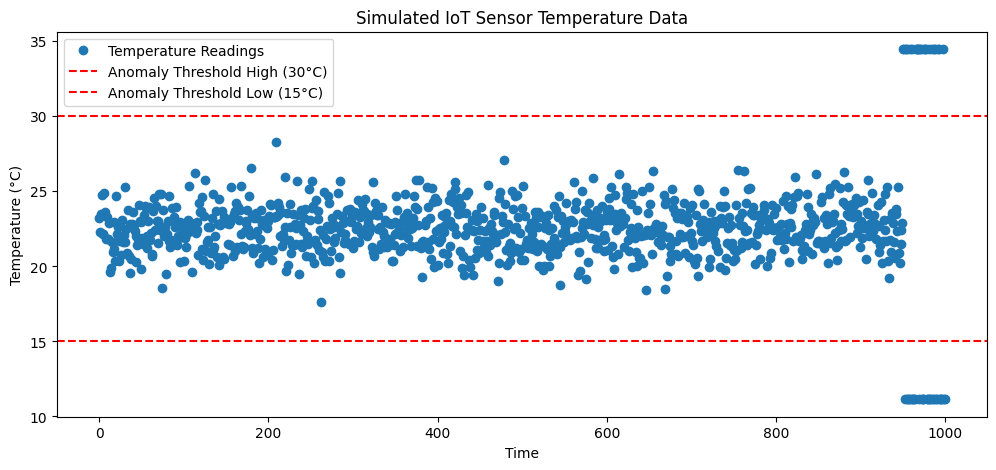

In [24]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate normal temperature readings (20°C to 25°C)
normal_temps = np.random.normal(loc=22.5, scale=1.5, size=950)

# Introduce some anomalies (spikes above 30°C or drops below 15°C)
anomalies = np.random.choice([np.random.uniform(30, 35), np.random.uniform(10, 15)], size=50)

# Combine data
temperatures = np.concatenate([normal_temps, anomalies])

# Create DataFrame
df = pd.DataFrame({"Temperature": temperatures})

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(df["Temperature"], label="Temperature Readings", marker='o', linestyle='')
plt.axhline(y=30, color='r', linestyle='--', label="Anomaly Threshold High (30°C)")
plt.axhline(y=15, color='r', linestyle='--', label="Anomaly Threshold Low (15°C)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Simulated IoT Sensor Temperature Data")
plt.show()




Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0039
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 16/50
57/57 ━━━━━━━━━━━

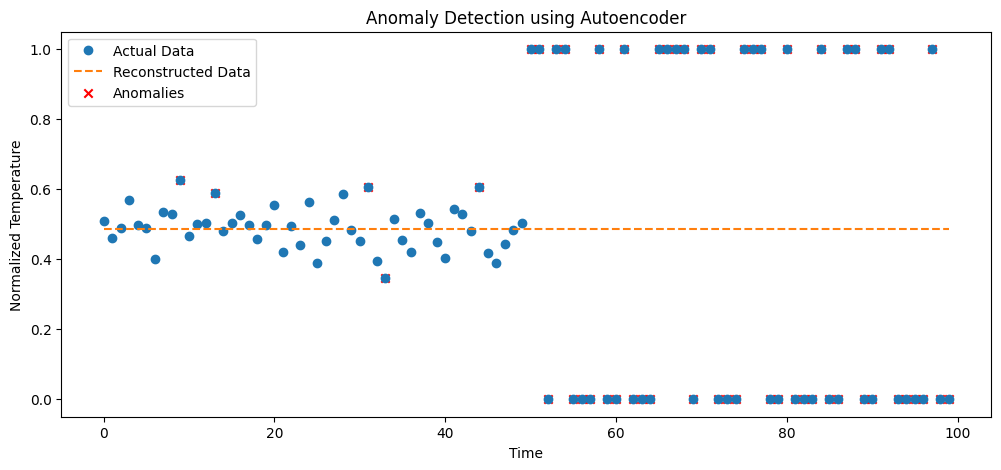

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
df["Temperature_scaled"] = scaler.fit_transform(df[["Temperature"]])

# Split into training and testing sets
train_data = df["Temperature_scaled"][:900]  # Normal data for training
test_data = df["Temperature_scaled"][900:]  # Includes anomalies

# Convert data to NumPy arrays
train_data = np.array(train_data).reshape(-1, 1)
test_data = np.array(test_data).reshape(-1, 1)

# Define the autoencoder model
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(1,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_data, train_data, epochs=50, batch_size=16, verbose=1)

# Get reconstructed values
reconstructed = model.predict(test_data)

# Compute reconstruction error
errors = np.abs(reconstructed - test_data)

# Define an anomaly threshold (e.g., 0.1)
threshold = 0.1
anomalies_detected = errors > threshold

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(test_data, label="Actual Data", marker='o', linestyle='')
plt.plot(reconstructed, label="Reconstructed Data", linestyle='dashed')
plt.scatter(np.where(anomalies_detected)[0], test_data[anomalies_detected], color='red', label="Anomalies", marker='x')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normalized Temperature")
plt.title("Anomaly Detection using Autoencoder")
plt.show()


In [26]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("anomaly_detector.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted to TensorFlow Lite format!")

Saved artifact at '/tmp/tmp0lugr4fg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138882094076688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094077456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094077264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094074960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094078032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094077648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094078416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882094078224: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model successfully converted to TensorFlow Lite format!


In [27]:


!pip install tensorflow numpy matplotlib



In [28]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


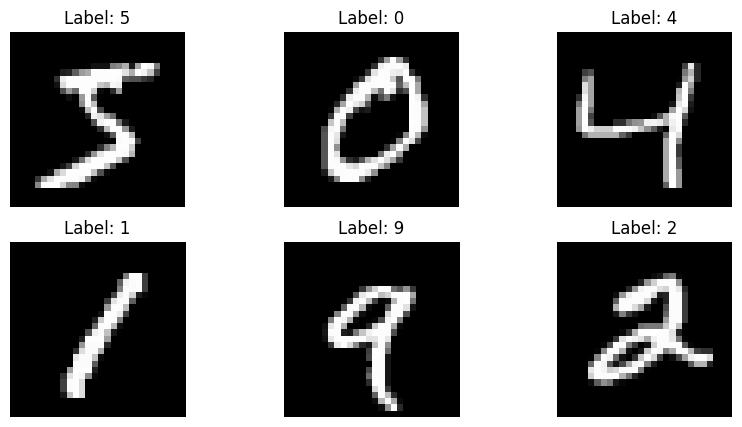

In [29]:


# Load the MNIST dataset (handwritten digits)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize some images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()





In [30]:
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 2D image to 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8828 - loss: 0.4229 - val_accuracy: 0.9616 - val_loss: 0.1314
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9649 - loss: 0.1208 - val_accuracy: 0.9662 - val_loss: 0.1128
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9748 - loss: 0.0829 - val_accuracy: 0.9756 - val_loss: 0.0822
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9834 - loss: 0.0543 - val_accuracy: 0.9765 - val_loss: 0.0791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9762 - val_loss: 0.0835


In [31]:



# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model converted to TensorFlow Lite format!")



Saved artifact at '/tmp/tmpodtr9m_9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_17')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138882540483600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332338960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882332339728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882083573008: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model converted to TensorFlow Lite format!


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


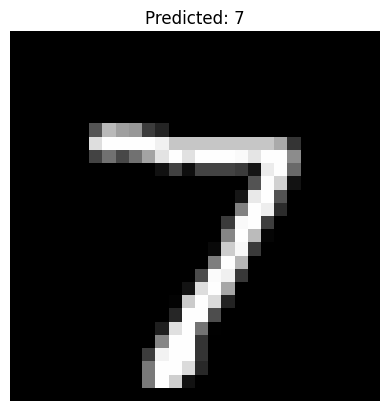

In [32]:


# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test inference on a single image
test_image = x_test[0].astype(np.float32).reshape(1, 28, 28)  # Reshape for model
interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()  # Run inference

# Get prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_digit = np.argmax(output_data)

# Show results
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7691 - loss: 0.6765 - val_accuracy: 0.8254 - val_loss: 0.4906
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8558 - loss: 0.4023 - val_accuracy: 0.8544 - val_loss: 0.4076
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8664 - loss: 0.3618 - val_accuracy: 0.8640 - val_loss: 0.3813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8776 - loss: 0.3324 - val_accuracy: 0.8604 - val_loss: 0.3790
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3093 - val_accuracy: 0.8661 - val_loss: 0.3749
Saved artifact at '/tmp/tmpvgjbvk0o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_21')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138882332341072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


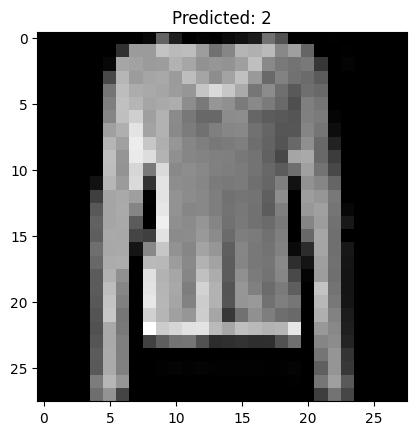

TinyML Model Prediction: 2


In [33]:

# =========================================
# 🧪 Lab 3: Deep Dive into TinyML (Google Colab)
# =========================================

# ✅ Step 1: Install Dependencies
!pip install tensorflow numpy matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ✅ Step 2: Load and Preprocess Data (Human Activity Recognition - HAR)
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# ✅ Step 3: Build a TinyML Model (Lightweight Neural Network for HAR)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Step 4: Train the Model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# ✅ Step 5: Convert Model to TensorFlow Lite (TFLite)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("tinyml_model_fashion.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model successfully converted to TFLite!")

# ✅ Step 6: Simulate Edge Deployment (Inference using TFLite)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Pick a random test image
random_idx = np.random.randint(0, len(x_test))
test_image = x_test[random_idx].reshape(1, 28, 28).astype(np.float32)

# Run inference on TFLite model
interpreter.set_tensor(input_details[0]['index'], test_image)
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(predictions)

# ✅ Step 7: Display the Result
plt.imshow(x_test[random_idx], cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()
print(f"TinyML Model Prediction: {predicted_label}")

# ✅ Step 8: Next Steps for Deployment (Optional)
# This TFLite model can now be deployed on microcontrollers like Arduino Nano 33 BLE Sense!